In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector

In [225]:
df = pd.read_csv("Carseats.csv")

In [226]:
df['Urban_Yes'] = pd.Series(np.zeros(df.shape[0]))
df.loc[df['Urban']=='Yes', 'Urban_Yes'] = 1

df['US_Yes'] = pd.Series(np.zeros(df.shape[0]))
df.loc[df['US']=='Yes', 'US_Yes'] = 1

df['ShelveLoc_rank'] = pd.Series(np.zeros(df.shape[0]))
df.loc[df['ShelveLoc']=='Good', 'ShelveLoc_rank'] = 2
df.loc[df['ShelveLoc']=='Medium', 'ShelveLoc_rank'] = 1

In [227]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_Yes,US_Yes,ShelveLoc_rank
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0,1.0,0.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1.0,1.0,2.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1.0,1.0,1.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1.0,1.0,1.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1.0,1.0,2.0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0.0,1.0,1.0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1.0,1.0,1.0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1.0,1.0,0.0


In [228]:
df['Sales'] = df['Sales'].astype('int64')
df['Urban_Yes'] = df['Urban_Yes'].astype('int64')
df['US_Yes'] = df['US_Yes'].astype('int64')
df['ShelveLoc_rank'] = df['ShelveLoc_rank'].astype('int64')

In [229]:
df.drop(['ShelveLoc', 'Urban', 'US'], axis=1, inplace=True)

In [230]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_rank
0,9,138,73,11,276,120,42,17,1,1,0
1,11,111,48,16,260,83,65,10,1,1,2
2,10,113,35,10,269,80,59,12,1,1,1
3,7,117,100,4,466,97,55,14,1,1,1
4,4,141,64,3,340,128,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12,138,108,17,203,128,33,14,1,1,2
396,6,139,23,3,37,120,55,11,0,1,1
397,7,162,26,12,368,159,40,18,1,1,1
398,5,100,79,7,284,95,50,12,1,1,0


In [231]:
X = df.iloc[:, 1:11]
y = df.iloc[:, 0]

In [232]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_rank
0,138,73,11,276,120,42,17,1,1,0
1,111,48,16,260,83,65,10,1,1,2
2,113,35,10,269,80,59,12,1,1,1
3,117,100,4,466,97,55,14,1,1,1
4,141,64,3,340,128,38,13,1,0,0


In [233]:
y

0       9
1      11
2      10
3       7
4       4
       ..
395    12
396     6
397     7
398     5
399     9
Name: Sales, Length: 400, dtype: int64

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                     k_features= (1,10),
                                                     forward=True,
                                                     floating = False,
                                                     verbose=2,
                                                     scoring= "accuracy",
                                                     cv= 9).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_s

In [237]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.21875, 0.0967741935483871, 0.12903225806451...",0.164091,"(Advertising,)",0.051675,0.06461,0.022843
2,"(2, 9)","[0.21875, 0.0967741935483871, 0.22580645161290...",0.185596,"(Advertising, ShelveLoc_rank)",0.046363,0.057968,0.020495
3,"(2, 6, 9)","[0.1875, 0.22580645161290322, 0.19354838709677...",0.200045,"(Advertising, Education, ShelveLoc_rank)",0.020478,0.025604,0.009053
4,"(2, 6, 8, 9)","[0.1875, 0.12903225806451613, 0.22580645161290...",0.192876,"(Advertising, Education, US_Yes, ShelveLoc_rank)",0.042158,0.052711,0.018636
5,"(2, 4, 6, 8, 9)","[0.1875, 0.25806451612903225, 0.19354838709677...",0.178539,"(Advertising, Price, Education, US_Yes, Shelve...",0.040417,0.050534,0.017866
6,"(1, 2, 4, 6, 8, 9)","[0.15625, 0.2903225806451613, 0.25806451612903...",0.189404,"(Income, Advertising, Price, Education, US_Yes...",0.046462,0.058093,0.020539
7,"(0, 1, 2, 4, 6, 8, 9)","[0.1875, 0.25806451612903225, 0.25806451612903...",0.178539,"(CompPrice, Income, Advertising, Price, Educat...",0.043924,0.05492,0.019417
8,"(0, 1, 2, 4, 5, 6, 8, 9)","[0.21875, 0.1935483870967742, 0.25806451612903...",0.185596,"(CompPrice, Income, Advertising, Price, Age, E...",0.056435,0.070562,0.024947
9,"(0, 1, 2, 4, 5, 6, 7, 8, 9)","[0.125, 0.1935483870967742, 0.2258064516129032...",0.178763,"(CompPrice, Income, Advertising, Price, Age, E...",0.040906,0.051146,0.018083
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.1875, 0.16129032258064516, 0.19354838709677...",0.174955,"(CompPrice, Income, Advertising, Population, P...",0.038503,0.048142,0.017021


In [238]:
import statsmodels.api as sm

In [239]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.68e-110
Time:                        13:34:20   Log-Likelihood:                -412.56
No. Observations:                 280   AIC:                             847.1
Df Residuals:                     269   BIC:                             887.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.0301      0.789      6.

In [264]:
X = df[['ShelveLoc_rank','Age', 'Price', 'Income', 'Advertising', 'CompPrice']]
y = df['Sales']

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [266]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
results = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.68e-110
Time:                        13:38:07   Log-Likelihood:                -412.56
No. Observations:                 280   AIC:                             847.1
Df Residuals:                     269   BIC:                             887.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.0301      0.789      6.

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
lm = LinearRegression()

In [245]:
lm.fit(X_train, y_train)

LinearRegression()

In [246]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Sales vs Model Predictions')

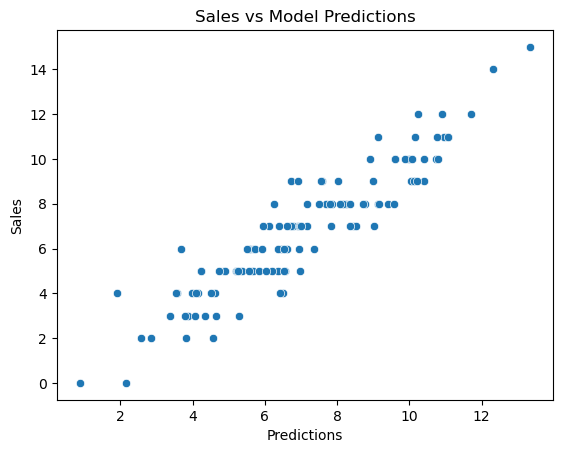

In [247]:
sns.scatterplot(x = predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Sales vs Model Predictions")


In [248]:
def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

def mse(y, y_hat):
    # calculate the residual error for each individual record
    resid = y - y_hat
    # square the residual (hence "squared error")
    sq_resid = resid**2
    # calculate the sum of squared errors
    SSR = sum(sq_resid)
    # divide by the number of records to get the mean squared error
    MSE = SSR / y.shape[0]
    return MSE

In [249]:
def gains_chart(actuals, predictions, num_buckets=10):
    # Combine actuals and predictions into a single DataFrame
    results = np.asarray([actuals, predictions]).T
    # Sort by predictions descending
    results = results[results[:,1].argsort()[::-1]]

    # Calculate total number of instances and cumulative count
    total_count = len(results)
    cumulative_count = np.arange(1, total_count + 1) / total_count

    # Calculate cumulative actuals
    cumulative_actuals = np.cumsum(results[:,0])

    # Calculate cumulative baseline (if predictions were randomly sorted)
    baseline = np.arange(1, total_count + 1) * np.sum(actuals) / total_count

    # Calculate gains
    gains = cumulative_actuals / np.sum(actuals)

    # Calculate AUC (Area Under the Gains Curve)
    auc_score = auc(cumulative_count, gains)

    # Plotting the gains chart
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_count, gains, marker='o', linestyle='-', color='b', label=f'Gains Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Baseline')
    plt.title('Gains Chart for Regression Model')
    plt.xlabel('Percentage of Population')
    plt.ylabel('Cumulative Gains')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print AUC
    print(f"Area Under the Gains Curve (AUC): {auc_score:.4f}")

def lift_chart_regression(actuals, predictions, num_buckets=10):
    # Create helper function for displaying lift charts
    # Combine actuals and predictions into a single DataFrame
    results = np.asarray([actuals, predictions]).T
    # Sort by predictions descending
    results = results[results[:,1].argsort()[::-1]]

    # Calculate total number of instances and cumulative count
    total_count = len(results)
    cumulative_count = np.arange(1, total_count + 1) / total_count

    # Calculate cumulative actuals
    cumulative_actuals = np.cumsum(results[:,0])

    # Calculate cumulative baseline (if predictions were randomly sorted)
    baseline = np.arange(1, total_count + 1) * np.sum(actuals) / total_count

    # Calculate lift
    lift = cumulative_actuals / baseline

    # Calculate cumulative lift
    cumulative_lift = np.cumsum(lift)

    # Plotting the lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_count, cumulative_lift, marker='o', linestyle='-', color='b', label='Lift Curve')
    plt.plot([0, 1], [1, 1], linestyle='--', color='r', label='Baseline')
    plt.title('Lift Chart for Regression Model')
    plt.xlabel('Percentage of Population')
    plt.ylabel('Lift')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [250]:
predictions_train = predict(X_train[['ShelveLoc_rank','Price','Advertising','Age']], results)
print('mse train:',mse(y_train, predictions_train))
predictions_test = predict(X_test[['ShelveLoc_rank','Price','Advertising','Age']], results)
print('mse test:',mse(y_test, predictions_test))

ValueError: shapes (280,4) and (7,) not aligned: 4 (dim 1) != 7 (dim 0)

In [ ]:
gains_chart(y_train,predictions_train)